In [2]:
# 02_STAT_HL_02_(Covariance Correlation)

Import Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# **Scatter Plot**
---

In [4]:
tv_hours = [3,5,2,0,5,3,1,4,3,4]
GPA = [2.7,2.1,3.3,3.4,2.0,3.0,3.6,2.8,3.5,2.6]

Graph a Scatter Plot with Matplotlib

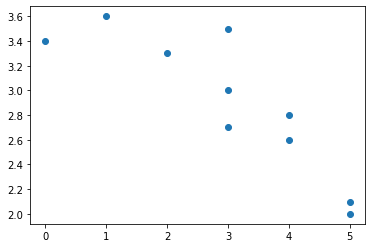

In [5]:
plt.scatter(tv_hours, GPA);

Draw a fitting line

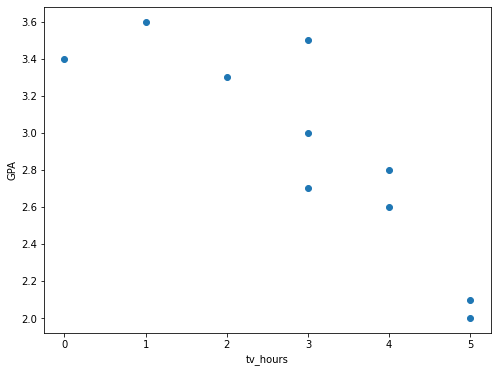

In [6]:
plt.figure(figsize=(8,6))
ax = plt.axes()
ax.scatter(tv_hours, GPA)
ax.set_xlabel("tv_hours")
ax.set_ylabel("GPA")
ax.axis("tight")
plt.show()

C:\Users\engin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


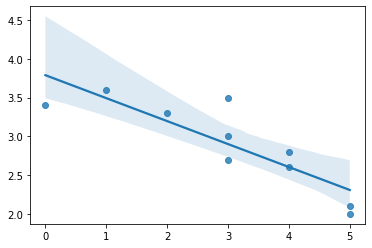

In [7]:
sns.regplot(tv_hours, GPA);

# **Correlation**

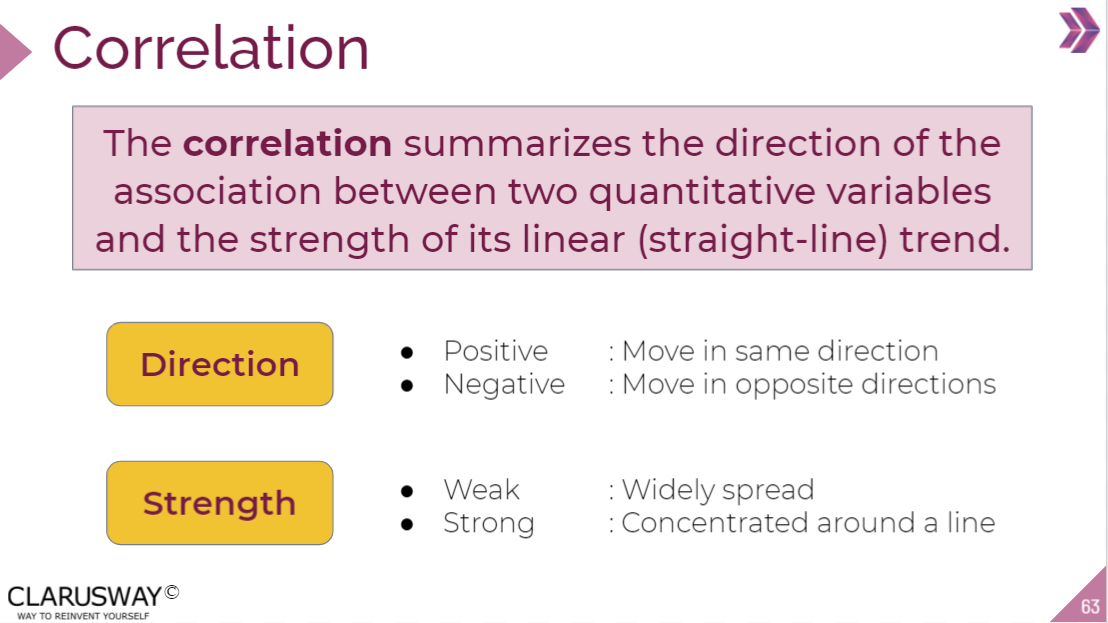

# Manuel (with Formula)

In [8]:
tv_hours = [3,5,2,0,5,3,1,4,3,4]
GPA = [2.7,2.1,3.3,3.4,2.0,3.0,3.6,2.8,3.5,2.6]

Convert the lists to Numpy arrays

In [9]:
# To have the product of tv_hours & GPA
# We change the values to array
x = np.array(tv_hours)
y = np.array(GPA)

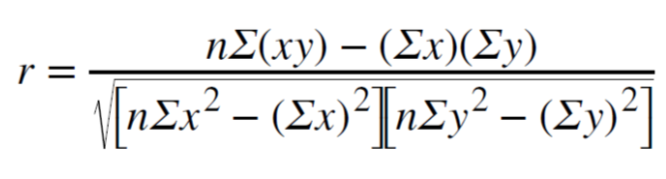

Use Pearson Correlation Formula. First calculate the numerator, second calculate the denominator, then calculate r coeff.

In [10]:
# Calculating with manual rules
numer = len(x)*sum(x*y) - sum(x)*sum(y)
numer

-71.00000000000011

In [11]:
denom = np.sqrt((len(x)*sum(x**2)-sum(x)**2)*(len(y)*sum(y**2)-sum(y)**2))
denom

82.84926070883178

In [12]:
r = numer/denom
r

-0.8569780755138527

# Scipy

In [13]:
# Calculating with Scipy
# "r": Correlation Value
# "p": Probability Value
r, p = stats.pearsonr(tv_hours, GPA)
print("r: ", r)
print("p: ", p)

r:  -0.8569780755138502
p:  0.0015347436269997083


In [31]:
stats.pearsonr(GPA, tv_hours)
print("r: ", r)
print("p: ", p)

r:  -0.8569780755138502
p:  0.0015347436269997083


The Spearman rank-order correlation coefficient is a nonparametric measure of the monotonicity of the relationship between two datasets. Unlike the Pearson correlation, the Spearman correlation does not assume that both datasets are normally distributed.

In [15]:
# results not changing 
stats.spearmanr(GPA, tv_hours)

SpearmanrResult(correlation=-0.8643457510060755, pvalue=0.001253729937570454)

Calculate Kendall’s tau, a correlation measure for ordinal data.

Kendall’s tau is a measure of the correspondence between two rankings.

In [16]:
stats.kendalltau(tv_hours, GPA)

KendalltauResult(correlation=-0.7542472332656507, pvalue=0.0033968772424454678)

## Numpy

Calculate covariance with Numpy

In [17]:
np.cov(GPA, tv_hours)
# 0.31:GPA Cov
# 2.77:tv_hours Cov 

array([[ 0.31777778, -0.78888889],
       [-0.78888889,  2.66666667]])

Calculate the sample variances

In [18]:
# GPA Sample Var
stats.tvar(GPA)

0.3177777777777777

In [36]:
# GPA Population Var
np.var(GPA)

0.2859999999999999

In [37]:
# tv_hours Sample Var
stats.tvar(tv_hours)

2.6666666666666665

In [38]:
# tv_hours Population Var
np.var(tv_hours)

2.4

Calculate the correlation coefficients with Numpy

In [20]:
np.corrcoef(tv_hours, GPA)
# Results:            tv_hours GPA
            # tv_hours  1.0     -0.85
            # GPA       -0.85   1.0

array([[ 1.        , -0.85697808],
       [-0.85697808,  1.        ]])

# Pandas

[Seaborn Datasets](https://github.com/mwaskom/seaborn-data)

[FiveThirtyEight Bad Drivers Dataset](https://www.kaggle.com/fivethirtyeight/fivethirtyeight-bad-drivers-dataset)

Load "car_crashes" dataset from Seaborn

In [21]:
df = sns.load_dataset("car_crashes")

In [22]:
df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [23]:
df.dtypes

total             float64
speeding          float64
alcohol           float64
not_distracted    float64
no_previous       float64
ins_premium       float64
ins_losses        float64
abbrev             object
dtype: object

Describe the dataset

In [24]:
df.describe()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,15.790196,4.998196,4.886784,13.573176,14.004882,886.957647,134.493137
std,4.122002,2.017747,1.729133,4.508977,3.764672,178.296285,24.835922
min,5.900000,1.792000,1.593000,1.760000,5.900000,641.960000,82.750000
25%,12.750000,3.766500,3.894000,10.478000,11.348000,768.430000,114.645000
50%,15.600000,4.608000,4.554000,13.857000,13.775000,858.970000,136.050000
75%,18.500000,6.439000,5.604000,16.140000,16.755000,1007.945000,151.870000
max,23.900000,9.450000,10.038000,23.661000,21.280000,1301.520000,194.780000


Create the correlation matrix with Pandas

In [25]:
df.corr()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
total,1.000000,0.611548,0.852613,0.827560,0.956179,-0.199702,-0.036011
speeding,0.611548,1.000000,0.669719,0.588010,0.571976,-0.077675,-0.065928
alcohol,0.852613,0.669719,1.000000,0.732816,0.783520,-0.170612,-0.112547
not_distracted,0.827560,0.588010,0.732816,1.000000,0.747307,-0.174856,-0.075970
no_previous,0.956179,0.571976,0.783520,0.747307,1.000000,-0.156895,-0.006359
ins_premium,-0.199702,-0.077675,-0.170612,-0.174856,-0.156895,1.000000,0.623116
ins_losses,-0.036011,-0.065928,-0.112547,-0.075970,-0.006359,0.623116,1.000000


In [26]:
df.corr().loc['total', 'no_previous']

0.9561791745723078

In [27]:
df["total"].corr(df["no_previous"])

0.9561791745723079

Spearman correlation matrix with Pandas

In [28]:
df.corr("spearman")

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
total,1.000000,0.559365,0.894576,0.877605,0.958206,-0.118070,-0.000045
speeding,0.559365,1.000000,0.642654,0.562876,0.541699,-0.052128,-0.065341
alcohol,0.894576,0.642654,1.000000,0.796959,0.856012,-0.122899,0.020679
not_distracted,0.877605,0.562876,0.796959,1.000000,0.798136,-0.112853,0.015340
no_previous,0.958206,0.541699,0.856012,0.798136,1.000000,-0.036969,0.003937
ins_premium,-0.118070,-0.052128,-0.122899,-0.112853,-0.036969,1.000000,0.646697
ins_losses,-0.000045,-0.065341,0.020679,0.015340,0.003937,0.646697,1.000000


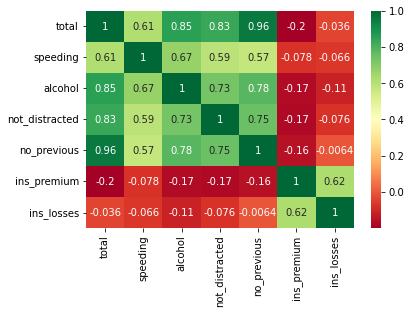

In [29]:
sns.heatmap(df.corr(),annot=True, cmap="RdYlGn");

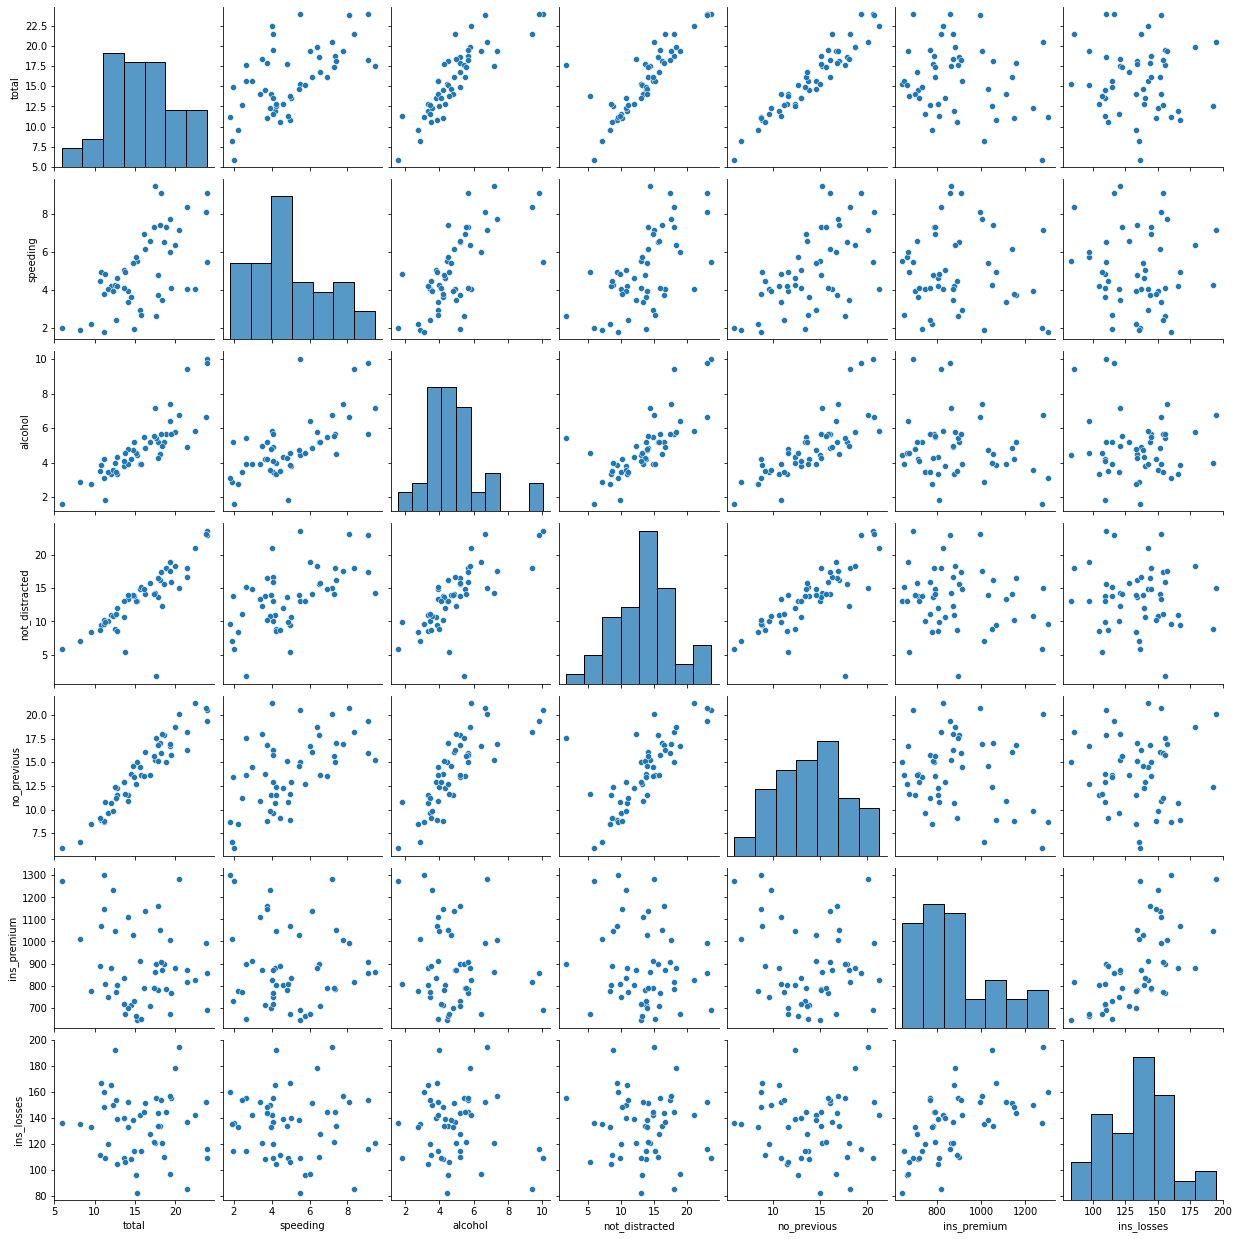

In [39]:
sns.pairplot(df);